In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mlbio1/train.csv
/kaggle/input/mlbio1/test.csv
/kaggle/input/mlbio1/sample_submission.csv


In [2]:
stroke_data = pd.read_csv('/kaggle/input/mlbio1/train.csv')
test_data = pd.read_csv('/kaggle/input/mlbio1/test.csv')
sample = pd.read_csv('/kaggle/input/mlbio1/sample_submission.csv')

In [3]:
stroke_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [5]:
stroke_data.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,28984.000000,30001.000000
mean,36379.812206,42.276327,0.09453,0.047832,104.598059,28.661727,0.017666
std,21066.978944,22.456670,0.29257,0.213414,43.251126,7.780740,0.131737
min,1.000000,0.080000,0.00000,0.000000,55.000000,10.100000,0.000000
25%,18012.000000,24.000000,0.00000,0.000000,77.500000,23.300000,0.000000
50%,36509.000000,44.000000,0.00000,0.000000,91.590000,27.800000,0.000000
75%,54546.000000,60.000000,0.00000,0.000000,112.160000,33.000000,0.000000
max,72943.000000,82.000000,1.00000,1.000000,281.590000,97.600000,1.000000


## Подготовим данные для построения моделей

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [7]:
fillna_imp = SimpleImputer(strategy='median')

In [8]:
cat_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(drop='if_binary')

In [9]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

# Feature selection 

Были убраны следующие колонки: 'ever_married', 'work_type', так как, на мой взгляд, эти данные в меньшей степени могут влиять на развитие инсульта с медицинской точки зрения. Все остальные показатели, такие как возраст, ИМТ и др., вносят определенный вклад в развитие инсульта ввиду побочных заболеваний, например ожирение ('bmi' выше нормы), диабет/инсулинорезистентность ('avg_glucose_level'выше/ниже нормы), 'smoking_status' (очевидно, что..) и т.д. 


In [10]:
transform_drop = ColumnTransformer(
    transformers=[
        ('drop', 'drop', ['ever_married', 'work_type'])
    ]
)

In [77]:
cat_tr = Pipeline(
    [
        ('fillna2', fillna_imp2),
        ('onehot', onehot),
    ]
)

In [78]:
fillna_imp2 = SimpleImputer(strategy='constant', fill_value='missing')
transform = ColumnTransformer(
    transformers=[
        ('fillna', fillna_imp, ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']),
        ('cat', cat_tr, cat_features),
        ('drop', 'drop', ['ever_married', 'work_type'])
    ]
)

In [79]:
X_train.shape

(30001, 10)

## Random_Forest


## Выберем наилучшие значения для гиперпараметров

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
rfc = RandomForestClassifier()
rfc_pipeline = Pipeline(
    [
        ('tr', transform),
        ('rfc', rfc)
    ]
)

### Были выбраны следующие гиперпараметры: max_depth, min_samples_leaf, n_estimators

In [81]:
stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29996,72228,Female,48.0,1,0,No,Govt_job,Rural,119.19,34.3,never smoked,0
29997,14747,Male,72.0,0,0,Yes,Self-employed,Urban,86.83,34.8,NaN,0
29998,50636,Female,20.0,0,0,No,Private,Rural,67.76,19.7,never smoked,0
29999,43161,Female,27.0,0,0,No,Private,Urban,82.65,22.5,never smoked,0


In [83]:
from sklearn.model_selection import GridSearchCV

max_depth = [5, 7, 11, 15, 20]
min_samples_leaf = [2, 3, 4, 5, 6]
n_estimators = [10, 50, 100, 150, 200]
param_grid = {
    'rfc__n_estimators': n_estimators,
    'rfc__max_depth': max_depth,
    'rfc__min_samples_leaf': min_samples_leaf
}
gs = GridSearchCV(rfc_pipeline, param_grid, cv = 5, verbose = 1, n_jobs=-1, scoring='roc_auc')
X_train = stroke_data.drop(['stroke', 'id'], axis=1)
y_train = stroke_data.stroke.fillna('median')
gs.fit(X_train, y_train)
gs.best_params_
gs.cv_results_

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 625 out of 625 | elapsed:  8.5min finished


{'mean_fit_time': array([0.37710948, 1.1501935 , 2.11228065, 3.17705173, 4.15598807,
        0.38639235, 1.19596138, 2.43656402, 3.17873449, 4.19232883,
        0.38104167, 1.16130462, 2.11512995, 3.12256761, 4.42434573,
        0.37442369, 1.33816843, 2.31633916, 3.50216775, 4.08102832,
        0.37422404, 1.21895714, 2.12497997, 3.13168807, 4.21701822,
        0.43988819, 1.4130043 , 2.57191148, 3.95483809, 5.06436868,
        0.41462913, 1.42792554, 2.56572843, 4.06052961, 5.42931108,
        0.42656679, 1.38859715, 2.72195549, 3.93407311, 4.95440254,
        0.42673426, 1.39042988, 2.61493387, 3.90901141, 4.98948112,
        0.42580466, 1.41564236, 2.84319906, 3.76088991, 5.36477041,
        0.50010476, 1.9021955 , 3.37863164, 4.59929752, 6.3668447 ,
        0.47905455, 1.68495383, 3.37939081, 4.89901986, 6.18104639,
        0.46918054, 1.83383832, 3.53266015, 4.73759556, 6.53088622,
        0.46416688, 1.66238594, 3.19134717, 4.50558944, 6.42529964,
        0.49116902, 1.79746614,

In [85]:
gs.best_params_

{'rfc__max_depth': 7, 'rfc__min_samples_leaf': 3, 'rfc__n_estimators': 200}

In [84]:
rfc_best_estimator = gs.best_estimator_

## N_estimators

In [102]:
from sklearn.model_selection import GridSearchCV

max_depth = [7] # fix
min_samples_leaf = [3] # fix
n_estimators = [50, 100, 200, 250, 300]
param_grid = {
    'rfc__n_estimators': n_estimators,
    'rfc__max_depth': max_depth,
    'rfc__min_samples_leaf': min_samples_leaf
}
gs = GridSearchCV(rfc_pipeline, param_grid, cv = 5, verbose = 1, n_jobs=-1, scoring='roc_auc')
gs.fit(X_train, y_train)

print(gs.best_params_)
mean_test_score = gs.cv_results_['mean_test_score']
print('Mean roc auc:', mean_test_score)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   32.9s finished


{'rfc__max_depth': 7, 'rfc__min_samples_leaf': 3, 'rfc__n_estimators': 200}
Mean roc auc: [0.84105725 0.84349516 0.84469746 0.84367442 0.8441655 ]


Text(0, 0.5, 'mean roc auc')

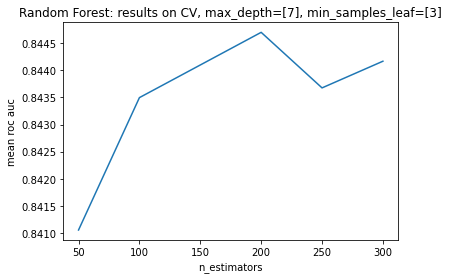

In [103]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(n_estimators, mean_test_score)
plt.title(f'Random Forest: results on CV, max_depth={max_depth}, min_samples_leaf={min_samples_leaf}')
plt.xlabel("n_estimators")
plt.ylabel("mean roc auc")

Наилучшее значение, как было показано выше, достигается при n_estimators = 200. При дальнейшем увеличении количества деревьев наблюдается переобучение. 

## Max_depth

In [104]:

max_depth = [5, 7, 11, 15, 20] 
min_samples_leaf = [3] # fix
n_estimators = [200] # fix
param_grid = {'rfc__max_depth': max_depth}
gs = GridSearchCV(rfc_pipeline, param_grid, cv = 5, verbose = 1, n_jobs=-1, scoring='roc_auc')
gs.fit(X_train, y_train)
print(gs.best_params_)
mean_test_score = gs.cv_results_['mean_test_score']
print('Mean roc auc:', mean_test_score)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   21.0s finished


{'rfc__max_depth': 7}
Mean roc auc: [0.84335185 0.84405043 0.82675583 0.80378261 0.78077345]


Text(0, 0.5, 'mean roc auc')

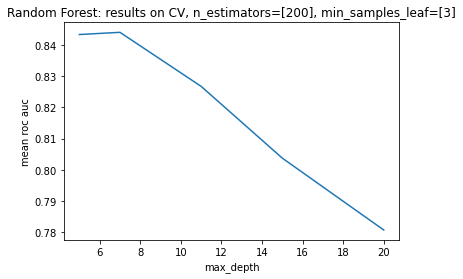

In [105]:
plt.plot(max_depth, mean_test_score)
plt.title(f'Random Forest: results on CV, n_estimators={n_estimators}, min_samples_leaf={min_samples_leaf}')
plt.xlabel("max_depth")
plt.ylabel("mean roc auc")

При увеличении глубины также происходит переобучение.

## Min_samples_leaf

In [106]:
max_depth = [7] # fix
min_samples_leaf = [2, 3, 4, 5, 6] 
n_estimators = [200] # fix
param_grid = {
    'rfc__n_estimators': n_estimators,
    'rfc__max_depth': max_depth,
    'rfc__min_samples_leaf': min_samples_leaf
}
gs = GridSearchCV(rfc_pipeline, param_grid, cv = 5, verbose = 1, n_jobs=-1, scoring='roc_auc')
gs.fit(X_train, y_train)
print(gs.best_params_)
mean_test_score = gs.cv_results_['mean_test_score']
print('Mean roc auc:', mean_test_score)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   36.0s finished


{'rfc__max_depth': 7, 'rfc__min_samples_leaf': 3, 'rfc__n_estimators': 200}
Mean roc auc: [0.84288017 0.84433575 0.84282325 0.84422299 0.84301489]


Text(0, 0.5, 'mean roc auc')

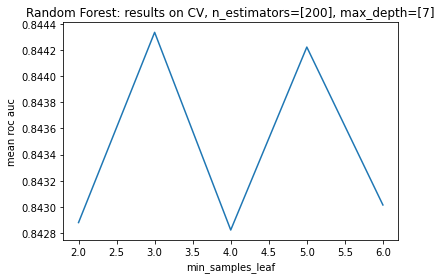

In [107]:
plt.plot(min_samples_leaf, mean_test_score)
plt.title(f'Random Forest: results on CV, n_estimators={n_estimators}, max_depth={max_depth}')
plt.xlabel("min_samples_leaf")
plt.ylabel("mean roc auc")

Здесь возникла сложность с интерпретацией результата :)

## Logistic Regression

## Гиперпараметры: C, penalty, solver

In [108]:
from sklearn.linear_model import LogisticRegression
lrg = LogisticRegression()
lrg_pipeline = Pipeline(
    [
        ('tr', transform),
        ('lrg', lrg)
    ]
)

In [109]:
from sklearn.model_selection import GridSearchCV

C = [1, 3, 5, 7, 9]
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
param_grid = {'lrg__C': C,
               'lrg__penalty': penalty,
               'lrg__solver': solver
             }
gs2 = GridSearchCV(lrg_pipeline, param_grid, cv = 5, verbose = 1, n_jobs=-1, scoring='roc_auc')
gs2.fit(X_train, y_train)
gs2.best_params_


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.3min finished


{'lrg__C': 1, 'lrg__penalty': 'none', 'lrg__solver': 'newton-cg'}

In [110]:
lrg_best_estimator = gs2.best_estimator_

## Solver

In [111]:
C = [1] # fix
penalty = ['none'] # fix
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
param_grid = {'lrg__C': C,
               'lrg__penalty': penalty,
               'lrg__solver': solver
             }
gs = GridSearchCV(lrg_pipeline, param_grid, cv = 5, verbose = 1, n_jobs=-1, scoring='roc_auc')
gs.fit(X_train, y_train)

print(gs.best_params_)
mean_test_score = gs.cv_results_['mean_test_score']
print('Mean roc auc:', mean_test_score)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   10.5s finished


{'lrg__C': 1, 'lrg__penalty': 'none', 'lrg__solver': 'newton-cg'}
Mean roc auc: [0.84640998 0.84594933        nan 0.71563479 0.69270749]


Text(0, 0.5, 'mean roc auc')

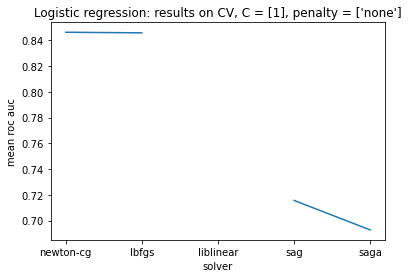

In [112]:
plt.plot(solver, mean_test_score)
plt.title(f'Logistic regression: results on CV, C = {C}, penalty = {penalty}')
plt.xlabel("solver")
plt.ylabel("mean roc auc")

Если решается оптимизационная задача, можно использовать следующие регуляризаторы: для 'newton-cg', 'sag' и 'lbfgs' - L2, для 'saga' - elasticnet

## C

In [114]:
C = [1, 3, 5, 7, 9] 
penalty = ['l2'] # fix
solver = ['lbfgs'] #fix
param_grid = {'lrg__C': C,
               'lrg__penalty': penalty,
               'lrg__solver': solver
             }
gs = GridSearchCV(lrg_pipeline, param_grid, cv = 5, verbose = 1, n_jobs=-1, scoring='roc_auc')
gs.fit(X_train, y_train)


print(gs.best_params_)
mean_test_score = gs.cv_results_['mean_test_score']
print('Mean roc auc:', mean_test_score)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    7.3s finished


{'lrg__C': 3, 'lrg__penalty': 'l2', 'lrg__solver': 'lbfgs'}
Mean roc auc: [0.84582066 0.84609947 0.84465312 0.84599252 0.8457275 ]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Text(0, 0.5, 'mean roc auc')

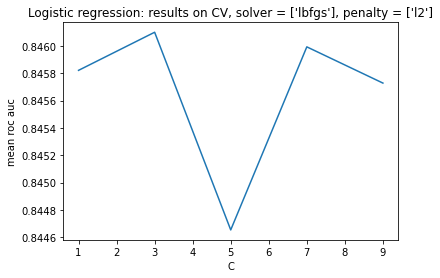

In [115]:
plt.plot(C, mean_test_score)
plt.title(f'Logistic regression: results on CV, solver = {solver}, penalty = {penalty}')
plt.xlabel("C")
plt.ylabel("mean roc auc")

## Penalty

In [117]:
C = [1] # fix
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg'] #fix
param_grid = {'lrg__C': C,
               'lrg__penalty': penalty,
               'lrg__solver': solver
             }
gs = GridSearchCV(lrg_pipeline, param_grid, cv = 5, verbose = 1, n_jobs=-1, scoring='roc_auc')
gs.fit(X_train, y_train)


print(gs.best_params_)
mean_test_score = gs.cv_results_['mean_test_score']
print('Mean roc auc:', mean_test_score)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.8s finished


{'lrg__C': 1, 'lrg__penalty': 'none', 'lrg__solver': 'newton-cg'}
Mean roc auc: [       nan 0.84639589        nan 0.84640998]


График не построить 

## Decision Tree 

In [118]:
from sklearn.tree import DecisionTreeClassifier 
dtc = DecisionTreeClassifier()
dtc_pipeline = Pipeline(
    [
        ('tr', transform),
        ('dtc', dtc)
    ]
)

## Гиперпараметры для Decision Tree: max_depth, min_samples_split, min_samples_leaf

In [121]:
max_depth = [2, 5, 10, 15, 25] 
min_samples_split = [2, 5, 7, 11, 15] 
min_samples_leaf = [2, 5, 7, 15, 25]
param_grid = {'dtc__max_depth': max_depth,
               'dtc__min_samples_split': min_samples_split,
               'dtc__min_samples_leaf': min_samples_leaf
             }
gs3 = GridSearchCV(dtc_pipeline, param_grid, cv = 5, verbose = 1, n_jobs=-1, scoring='roc_auc')
gs3.fit(X_train, y_train)

gs3.best_params_


Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done 625 out of 625 | elapsed:  1.0min finished


{'dtc__max_depth': 5, 'dtc__min_samples_leaf': 2, 'dtc__min_samples_split': 2}

In [122]:
dtc_best_estimator = gs3.best_estimator_

## Max_depth

In [123]:
max_depth = [2, 5, 10, 15, 25] 
min_samples_split = [2] 
min_samples_leaf = [2] 
param_grid = {'dtc__max_depth': max_depth,
               'dtc__min_samples_split': min_samples_split,
               'dtc__min_samples_leaf': min_samples_leaf
             }
gs = GridSearchCV(dtc_pipeline, param_grid, cv = 5, verbose = 1, n_jobs=-1, scoring='roc_auc')
gs.fit(X_train, y_train)


print(gs.best_params_)
mean_test_score = gs.cv_results_['mean_test_score']
print('Mean roc auc:', mean_test_score)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.5s finished


{'dtc__max_depth': 5, 'dtc__min_samples_leaf': 2, 'dtc__min_samples_split': 2}
Mean roc auc: [0.79178529 0.82647565 0.69699186 0.55855052 0.54502078]


Text(0, 0.5, 'mean roc auc')

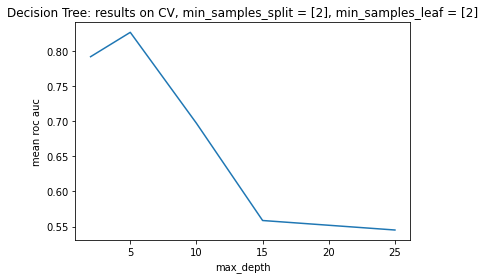

In [124]:
plt.plot(max_depth, mean_test_score)
plt.title(f'Decision Tree: results on CV, min_samples_split = {min_samples_split}, min_samples_leaf = {min_samples_leaf}')
plt.xlabel("max_depth")
plt.ylabel("mean roc auc")

Переобучение

## min_samples_leaf

In [126]:
max_depth = [5] # fix
min_samples_split = [2] # fix
min_samples_leaf = [2, 5, 7, 10, 13] 
param_grid = {'dtc__max_depth': max_depth,
               'dtc__min_samples_split': min_samples_split,
               'dtc__min_samples_leaf': min_samples_leaf
             }
gs = GridSearchCV(dtc_pipeline, param_grid, cv = 5, verbose = 1, n_jobs=-1, scoring='roc_auc')
gs.fit(X_train, y_train)


print(gs.best_params_)
mean_test_score = gs.cv_results_['mean_test_score']
print('Mean roc auc:', mean_test_score)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.6s finished


{'dtc__max_depth': 5, 'dtc__min_samples_leaf': 2, 'dtc__min_samples_split': 2}
Mean roc auc: [0.82650958 0.82364232 0.82239977 0.82461538 0.82483114]


Text(0, 0.5, 'mean roc auc')

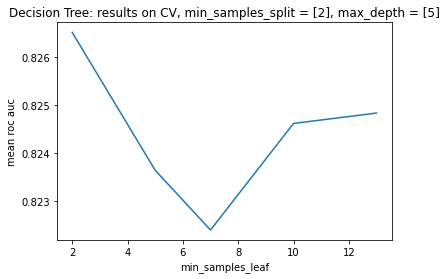

In [127]:
plt.plot(min_samples_leaf, mean_test_score)
plt.title(f'Decision Tree: results on CV, min_samples_split = {min_samples_split}, max_depth = {max_depth}')
plt.xlabel("min_samples_leaf")
plt.ylabel("mean roc auc")

Уменьшение min_samples_leaf не приводит к переобучению.

## min_samples_split

In [131]:
max_depth = [5] #fix
min_samples_split = [2, 5, 7, 10, 13] 
min_samples_leaf = [5] # fix 
param_grid = {'dtc__max_depth': max_depth,
               'dtc__min_samples_split': min_samples_split,
               'dtc__min_samples_leaf': min_samples_leaf
             }
gs = GridSearchCV(dtc_pipeline, param_grid, cv = 5, verbose = 1, n_jobs=-1, scoring='roc_auc')
gs.fit(X_train, y_train)


print(gs.best_params_)
mean_test_score = gs.cv_results_['mean_test_score']
print('Mean roc auc:', mean_test_score)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.4s finished


{'dtc__max_depth': 5, 'dtc__min_samples_leaf': 5, 'dtc__min_samples_split': 7}
Mean roc auc: [0.82364056 0.82354469 0.82367369 0.8236428  0.82357142]


Text(0, 0.5, 'mean roc auc')

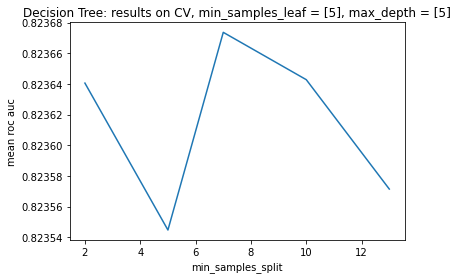

In [132]:
plt.plot(min_samples_split, mean_test_score)
plt.title(f'Decision Tree: results on CV, min_samples_leaf = {min_samples_leaf}, max_depth = {max_depth}')
plt.xlabel("min_samples_split")
plt.ylabel("mean roc auc")

In [133]:
ss = pd.read_csv('../input/mlbio1/sample_submission.csv')
pred = model.predict(test_data)
ss['stroke'] = pred
ss.to_csv('submission.csv', index=False)

In [142]:
ss_rfc = ss.copy()
X_test = test_data.drop(['id'], axis=1)
rfc_pred = 1 - rfc_best_estimator.predict_proba(X_test)
ss_rfc['stroke'] = rfc_pred
ss_rfc.to_csv('submission_rfc.csv', index=False)

In [143]:
ss_lrg = ss.copy()
X_test = test_data.drop(['id'], axis=1)
lrg_pred = 1 - lrg_best_estimator.predict_proba(X_test)
ss_lrg['stroke'] = lrg_pred
ss_lrg.to_csv('submission_lrg.csv', index=False)

In [144]:
ss_dtc = ss.copy()
X_test = test_data.drop(['id'], axis=1)
dtc_pred = 1 - dtc_best_estimator.predict_proba(X_test)
ss_dtc['stroke'] = dtc_pred
ss_dtc.to_csv('submission_dtc.csv', index=False)

Private leaderboard
* LogRegression: 0.85299
* RandomForest: 0.85975
* DecisionTree: 0.83899